# csvファイルを読み込む

In [15]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = [0] * 5
files = ["log_2023_06_14_19_18_41.csv", "log_2023_06_14_19_29_47.csv", "log_2023_06_14_19_40_25.csv", "log_2023_06_14_19_51_21.csv", "log_2023_06_14_20_01_47.csv"]

for i in range(5):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","x4","x5","ymax","x0max","x1max","x2max","x3max","x4max","x5max"],
    encoding="SHIFT-JIS")


# ループ数とBPM値のグラフを描写

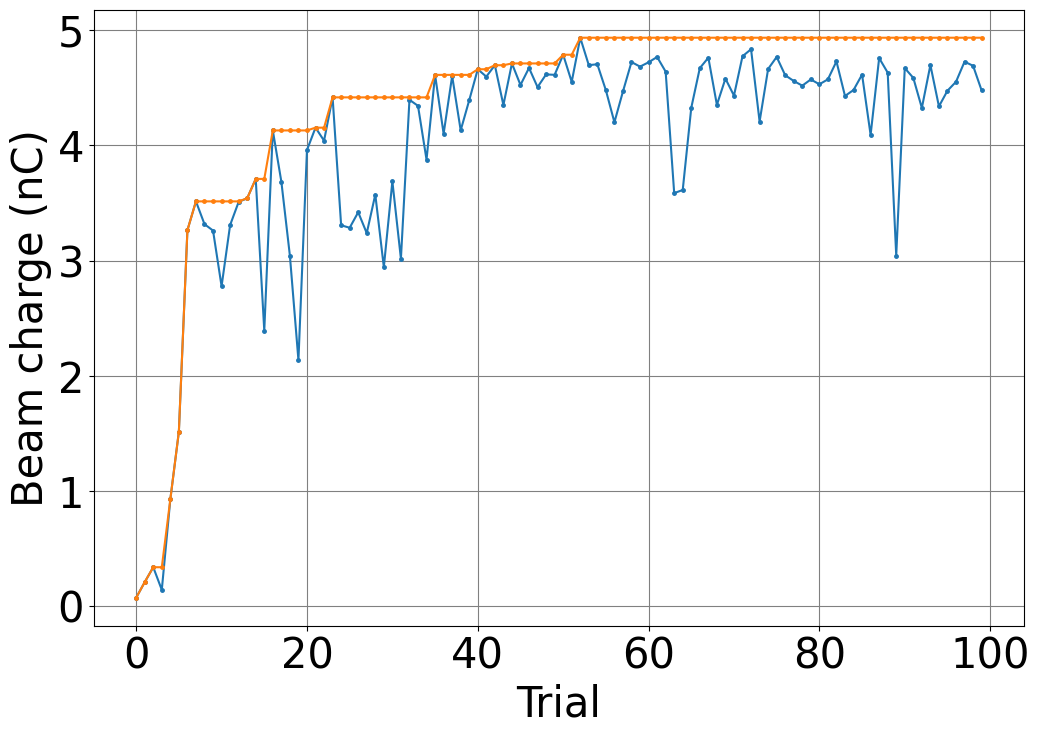

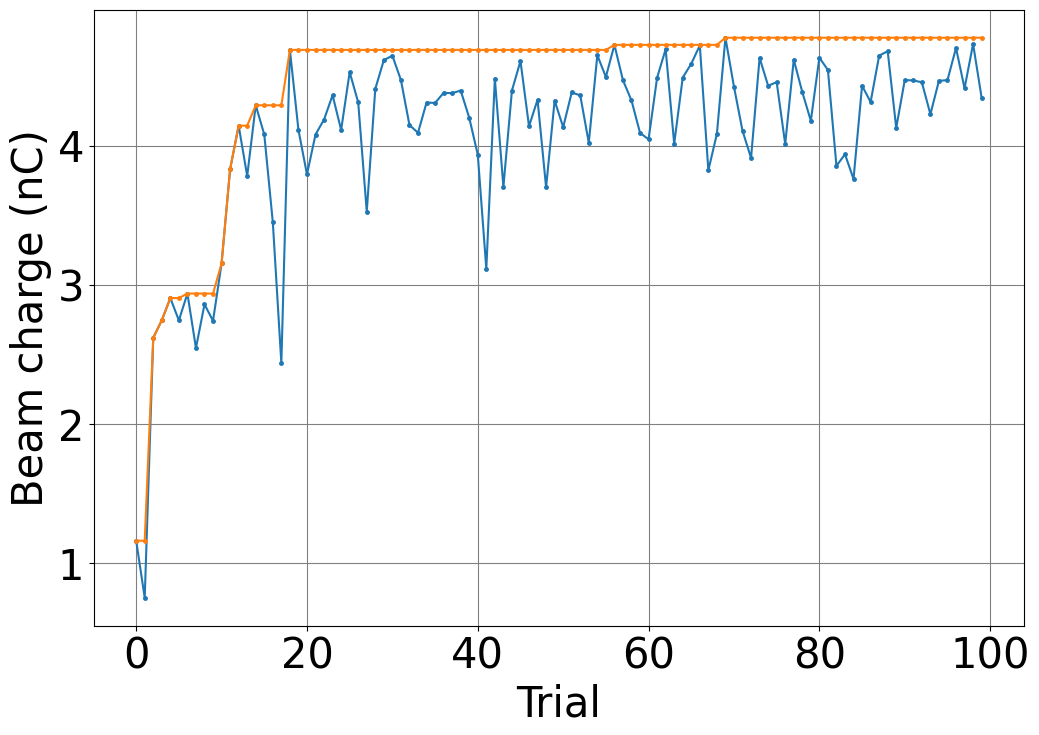

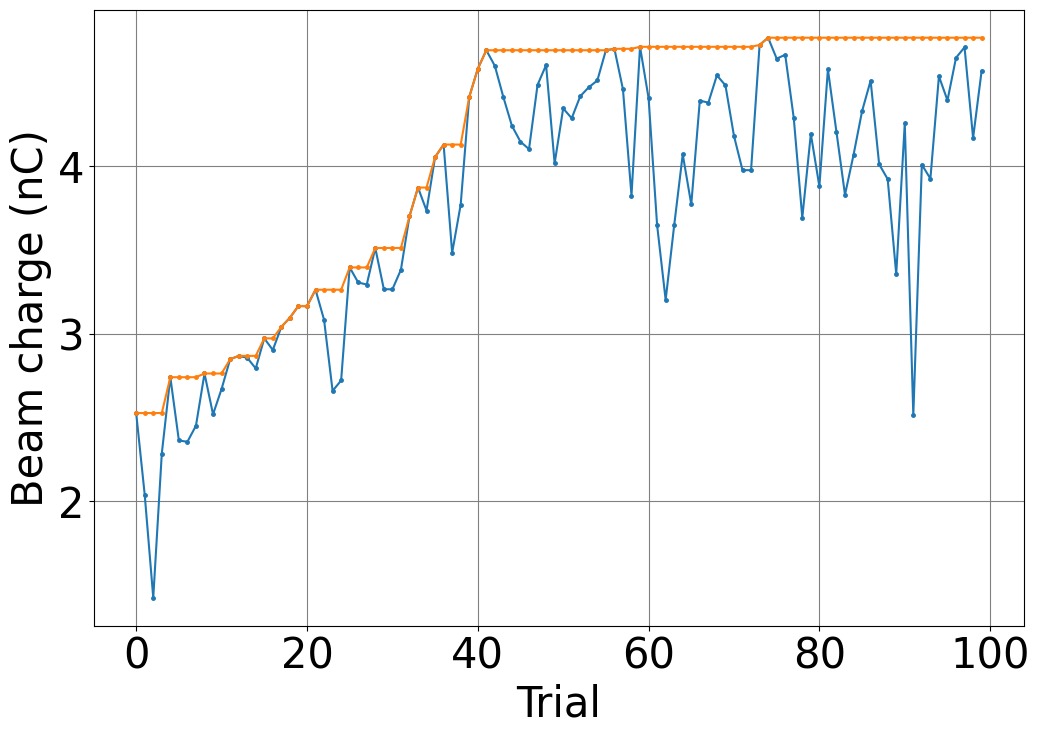

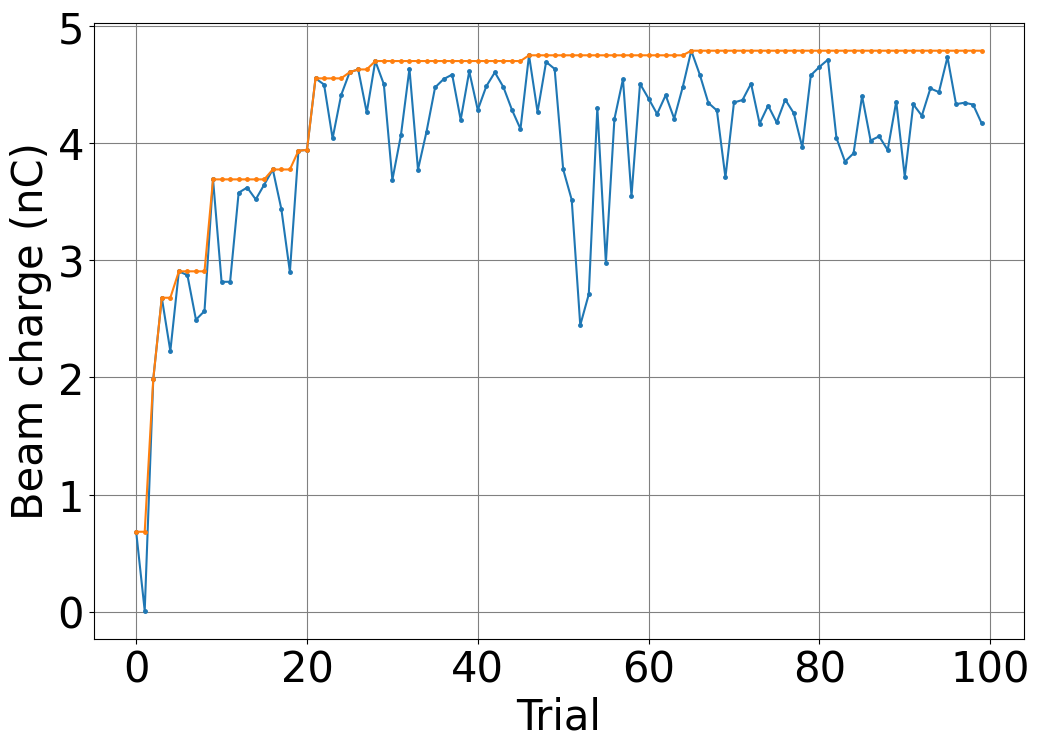

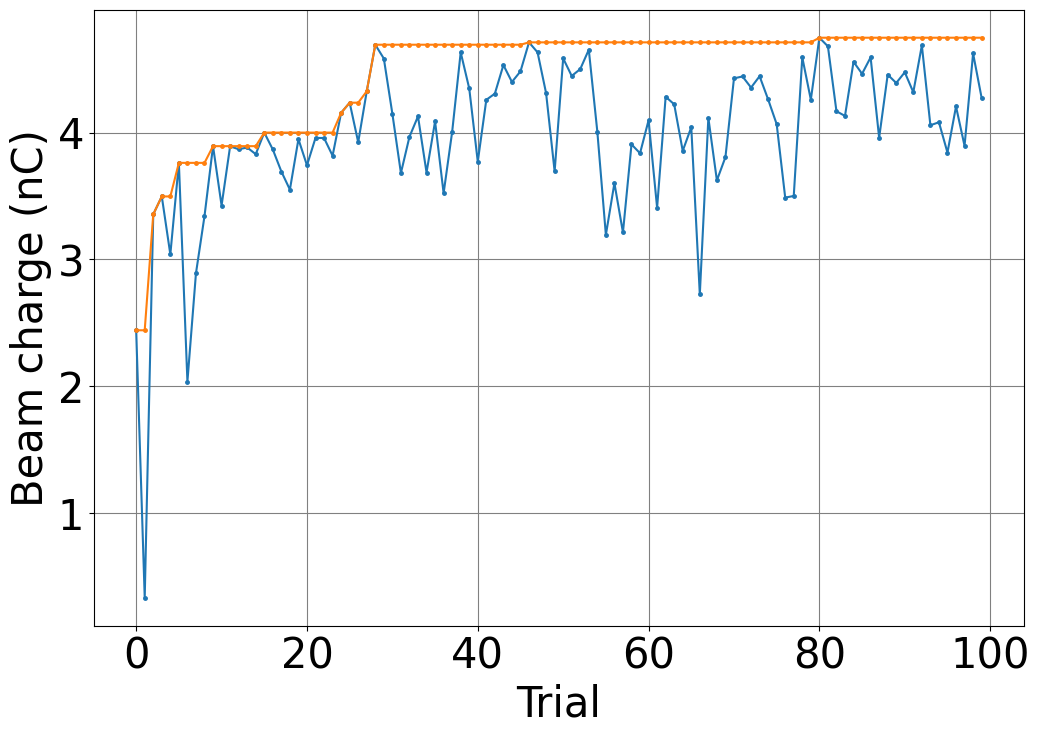

In [16]:
import matplotlib.pyplot as plt

for i in range (5):

    figi,axi = plt.subplots(1,1,figsize=[12,8])

    plt.plot(df[i]["n"],df[i]["y"], marker = "." , markersize = 5,label = "BPM Charge")
    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 5 , label = "BPM Max Charge")
    plt.tick_params(labelsize=30)
    axi.grid(which = "major" , color = "gray" , linestyle = "-")
    axi.set_xlabel("Trial", fontsize = 30)
    axi.set_ylabel("Beam charge (nC)", fontsize = 30)
    #axi.legend()
    #axi.set_title('6param UCB(beta = 2.0) data' + str(i+1))


# 各最大値を比較

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


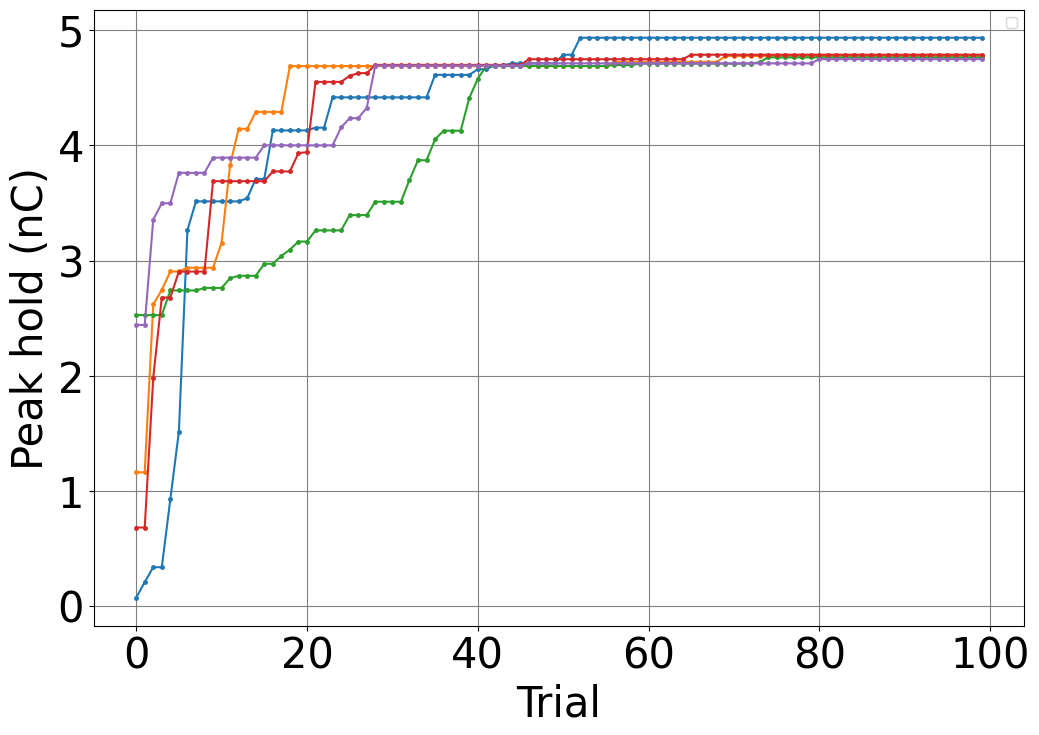

In [17]:
fig_sum,ax_sum = plt.subplots(1,1,figsize=[12,8])

for i in range (5):

    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 5 )
    #, label = "BPM Max Charge(" + str(i+1) + ")"
plt.tick_params(labelsize=30)
ax_sum.grid(which = "major" , color = "gray" , linestyle = "-")
ax_sum.set_xlabel("Trial", fontsize=30)
ax_sum.set_ylabel("Peak hold (nC)", fontsize=30)
ax_sum.legend()
#ax_sum.set_title('6param EI All data', fontsize=30)

# 平均を描写

Text(0.5, 1.0, '6param UCB(beta = 2.0) Mean data')

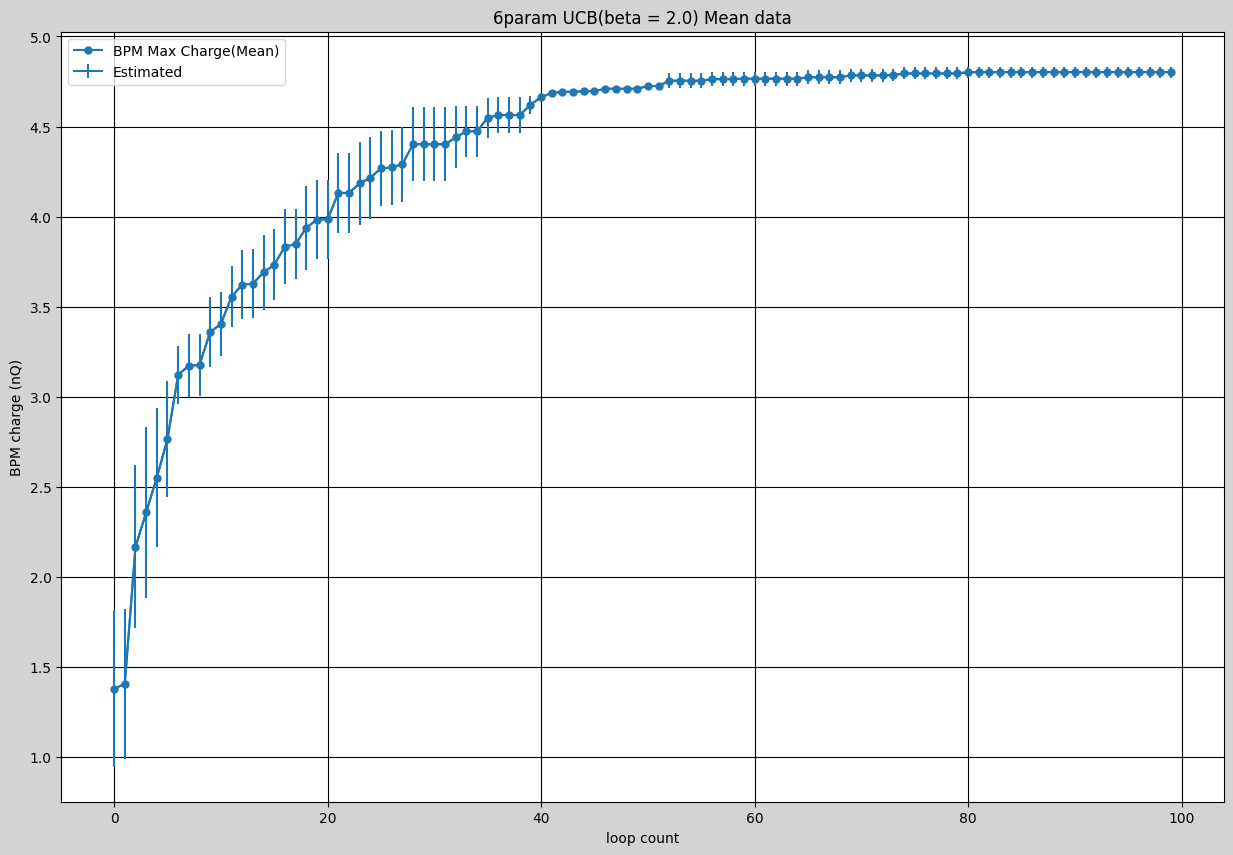

In [18]:
fig_ave,ax_ave = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

sum = 0
sum_minus_mean = 0

for j in range (5):

    sum = sum + df[j]["ymax"]

mean = sum/(j+1)

for i in range (5):
    
    sum_minus_mean = sum_minus_mean + (df[i]["ymax"] - mean)**2

error = ((sum_minus_mean)**(0.5))/(i+1)

plt.plot(df[0]["n"],mean, marker = "." , markersize = 10 , label = "BPM Max Charge(Mean)")
plt.errorbar(df[0]["n"],mean, yerr=error, label='Estimated', color='C0')

ax_ave.grid(which = "major" , color = "black" , linestyle = "-")
ax_ave.set_xlabel("loop count")
ax_ave.set_ylabel("BPM charge (nQ)")
ax_ave.legend()
ax_ave.set_title('6param UCB(beta = 2.0) Mean data')




Text(0.5, 1.0, 'traveldistance mean')

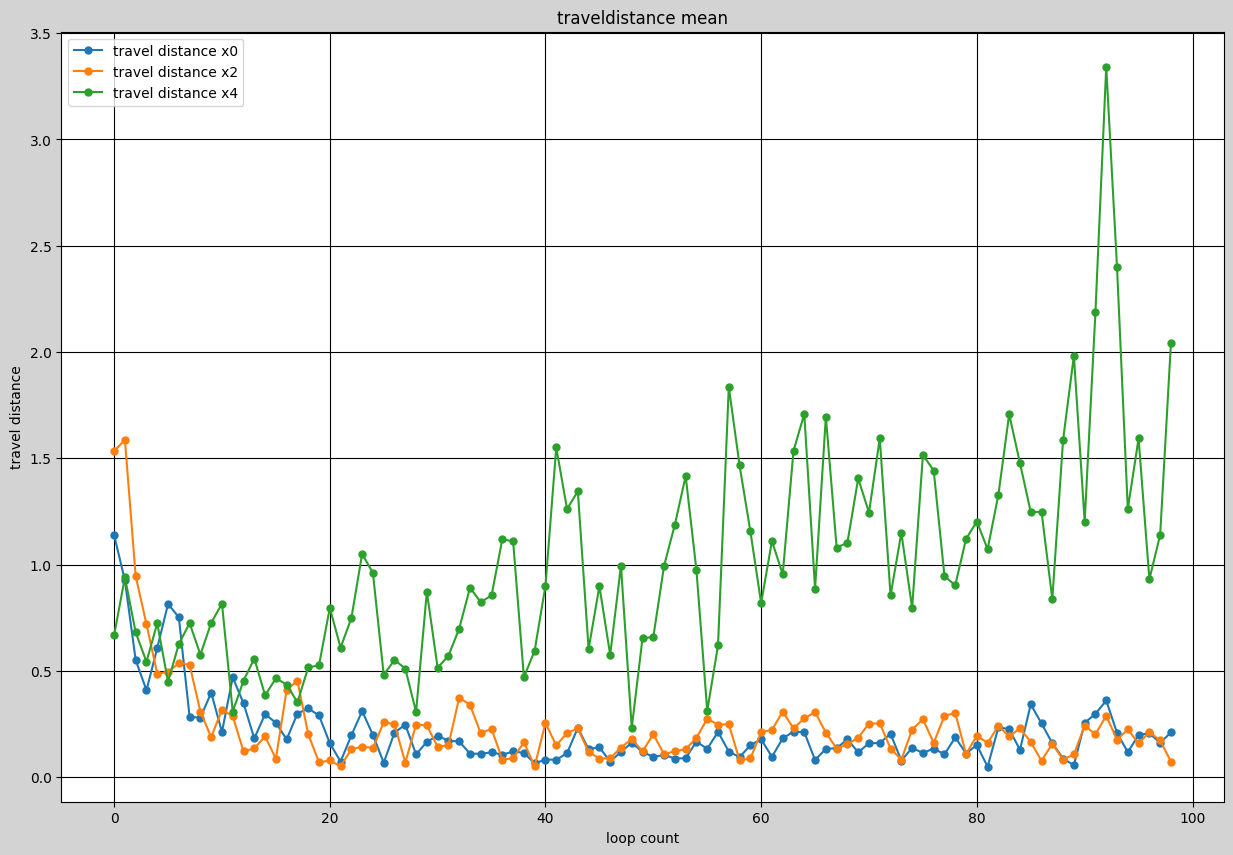

In [19]:
fig_t,ax_t = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

xx = []
x = [] 
a = []

numbers = [i for i in range(0, 99)]

for k in range (5): #5回の試行
    for j in range (6): #パラメータの指定
        for i in range (99): #セルの列数

            a.append(abs(df[k]["x" + str(j)][i+1] - df[k]["x" + str(j)][i]))
        
        x.append(a)
        a = []
        
    xx.append(x)
    x = []



mean_qp = []
mean_p = []
b = 0

for p in range (6):
    for q in range (99): 
        for m in range (5):
            b = b + xx[m][p][q]
        
        mean_qp.append(b/m)
        b = 0
        
    mean_p.append(mean_qp)
    mean_qp = []


for n in (0,2,4):
    
    plt.plot(numbers,mean_p[n], marker = "." , markersize = 10 , label = "travel distance x" + str(n))





ax_t.grid(which = "major" , color = "black" , linestyle = "-")
ax_t.set_xlabel("loop count")
ax_t.set_ylabel("travel distance")
ax_t.legend()
ax_t.set_title('traveldistance mean')

Text(0.5, 1.0, 'Empirical distribution function mean')

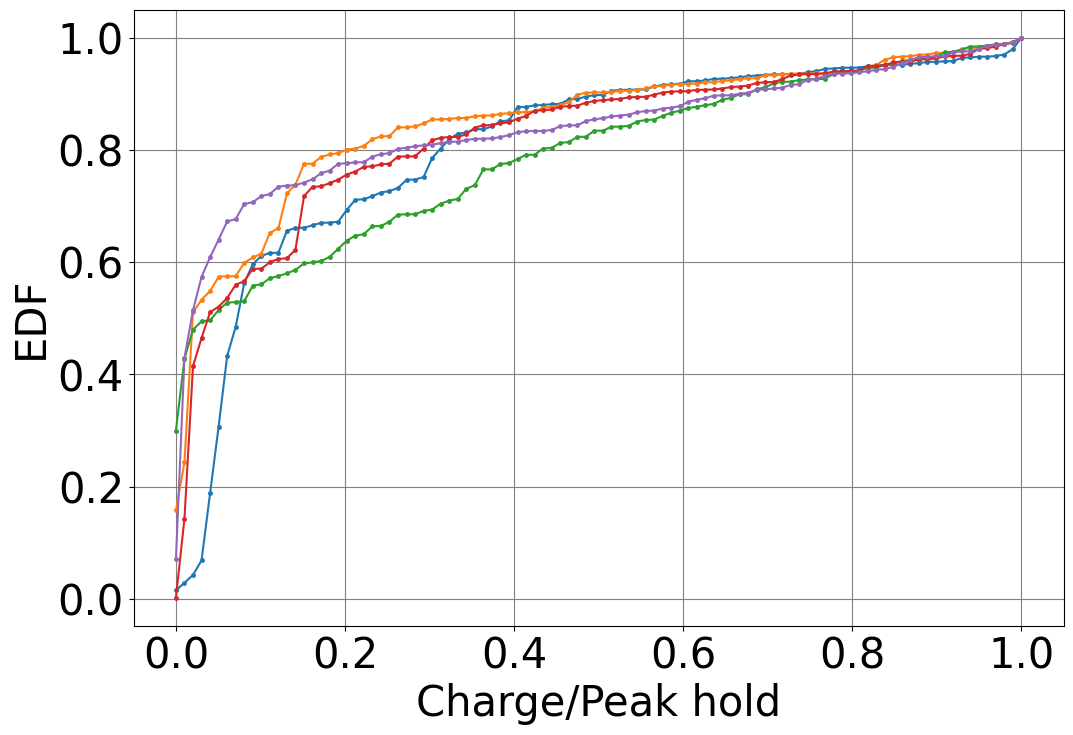

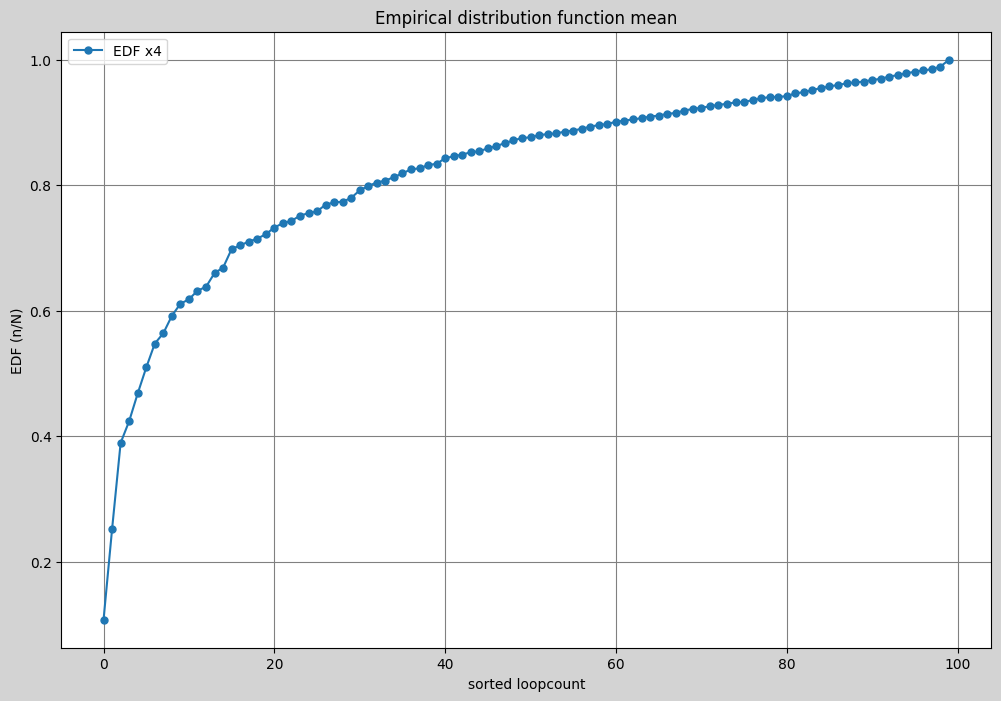

In [20]:
fig_e,ax_e = plt.subplots(1,1,figsize=[12,8])

sum_e = 0
sum_max_e = 0

for s in range (5):
    c = np.sort(df[s]["y"])
    sum_e = sum_e + c
    d = df[s]["ymax"][99]
    sum_max_e = sum_max_e + d
    plt.plot(df[0]["n"]/99,c/d, marker = "." , markersize = 5 , label = "EDF x" + str(s))
    
plt.tick_params(labelsize=30)
ax_e.grid(which = "major" , color = "gray" , linestyle = "-")
ax_e.set_xlabel("Charge/Peak hold", fontsize = 30)
ax_e.set_ylabel("EDF",fontsize = 30)
#ax_e.legend()
#ax_e.set_title('Empirical distribution function')

fig_e_mean,ax_e_mean = plt.subplots(1,1,figsize=[12,8],facecolor = 'lightgray')

plt.plot(df[0]["n"],sum_e/sum_max_e, marker = "." , markersize = 10 , label = "EDF x" + str(s))

ax_e_mean.grid(which = "major" , color = "gray" , linestyle = "-")
ax_e_mean.set_xlabel("sorted loopcount")
ax_e_mean.set_ylabel("EDF (n/N)")
ax_e_mean.legend()
ax_e_mean.set_title('Empirical distribution function mean')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


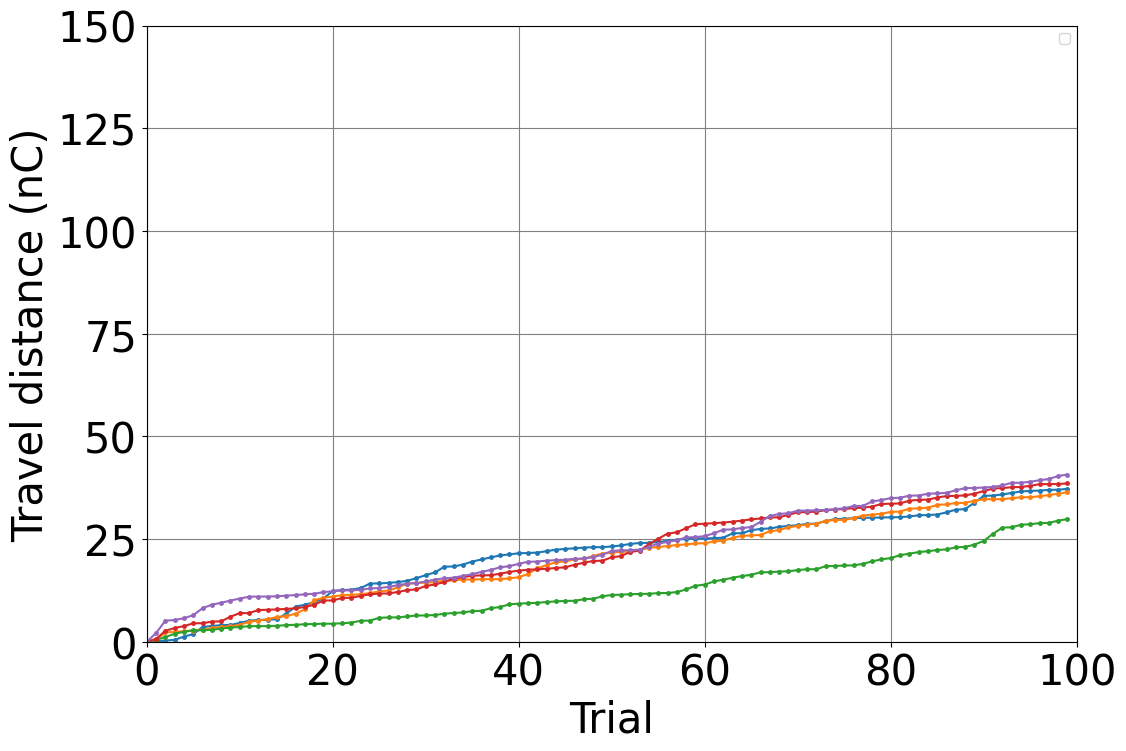

In [21]:
ffig_sum,ax_sum = plt.subplots(1,1,figsize=[12,8])



for i in range (5):

    TD = [0]*100
    

    for k in range (1 , 100):

        
        TD[0] = 0
        TD[k] = TD[k-1] + abs(df[i]["y"][k] - df[i]["y"][k-1])


    plt.plot(df[i]["n"],TD, marker = "." , markersize = 5 )
    #, label = "BPM Max Charge(" + str(i+1) + ")"
plt.tick_params(labelsize=30)
plt.xlim(0, 100)
plt.ylim(0, 150)
ax_sum.grid(which = "major" , color = "gray" , linestyle = "-")
ax_sum.set_xlabel("Trial", fontsize=30)
ax_sum.set_ylabel("Travel distance (nC)", fontsize=30)
ax_sum.legend()
#ax_sum.set_title('6param EI All data', fontsize=30)
        

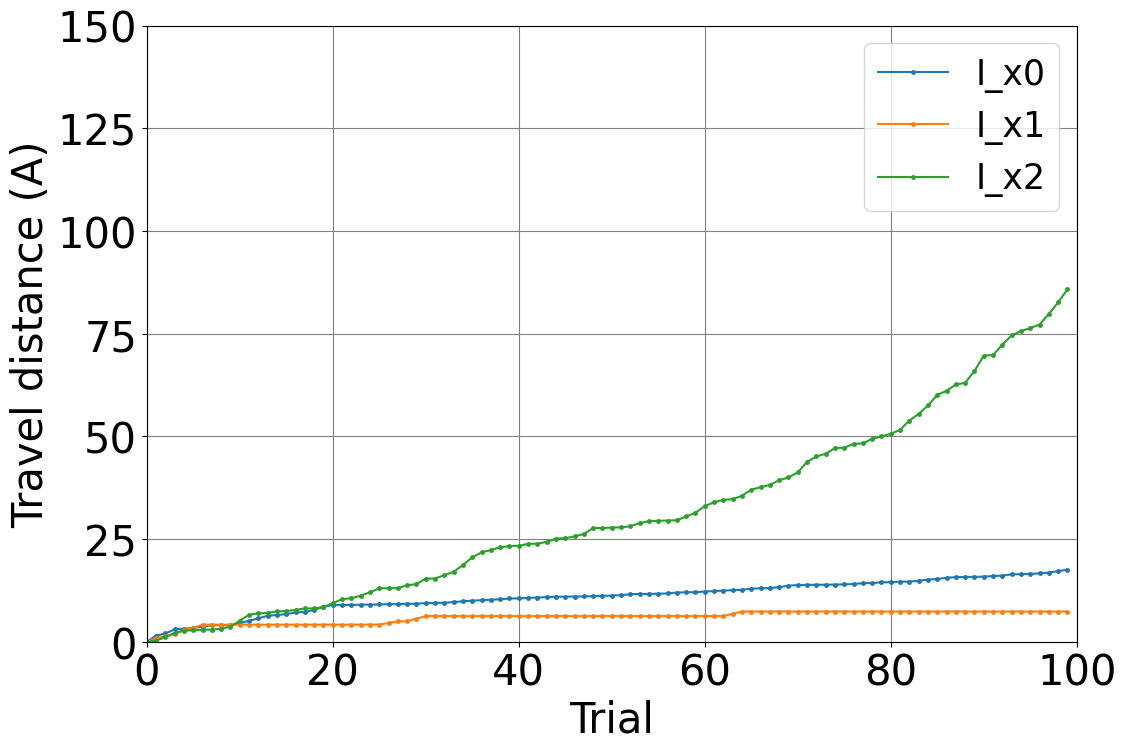

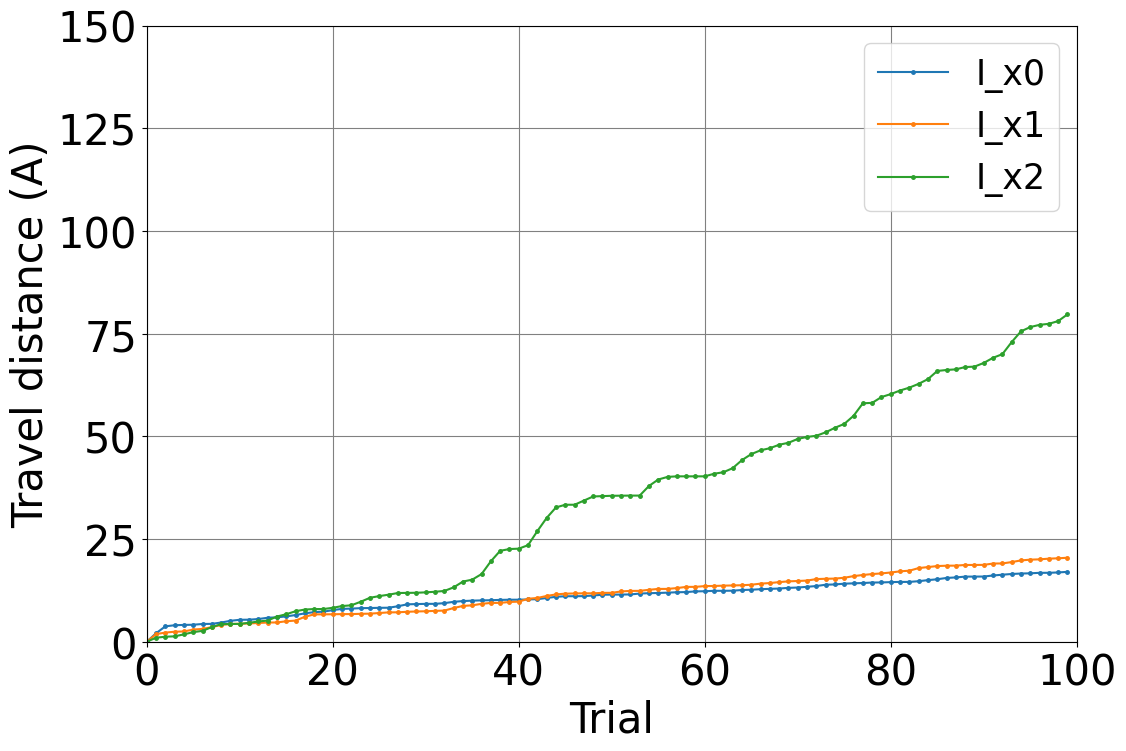

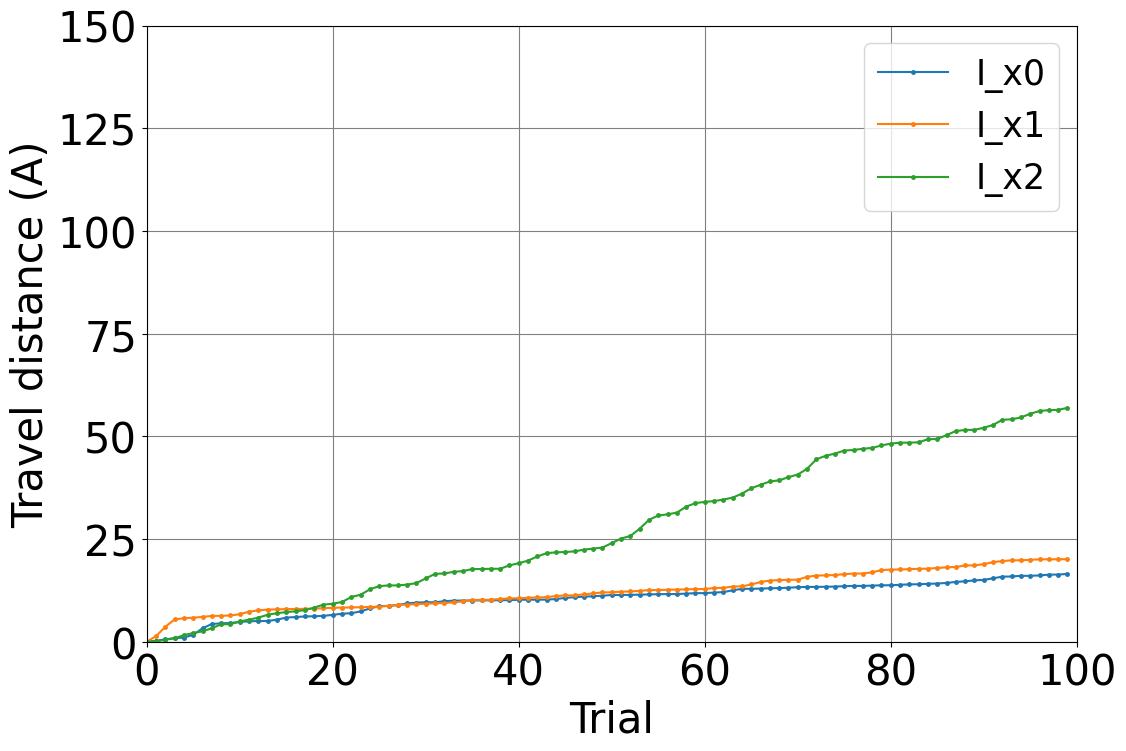

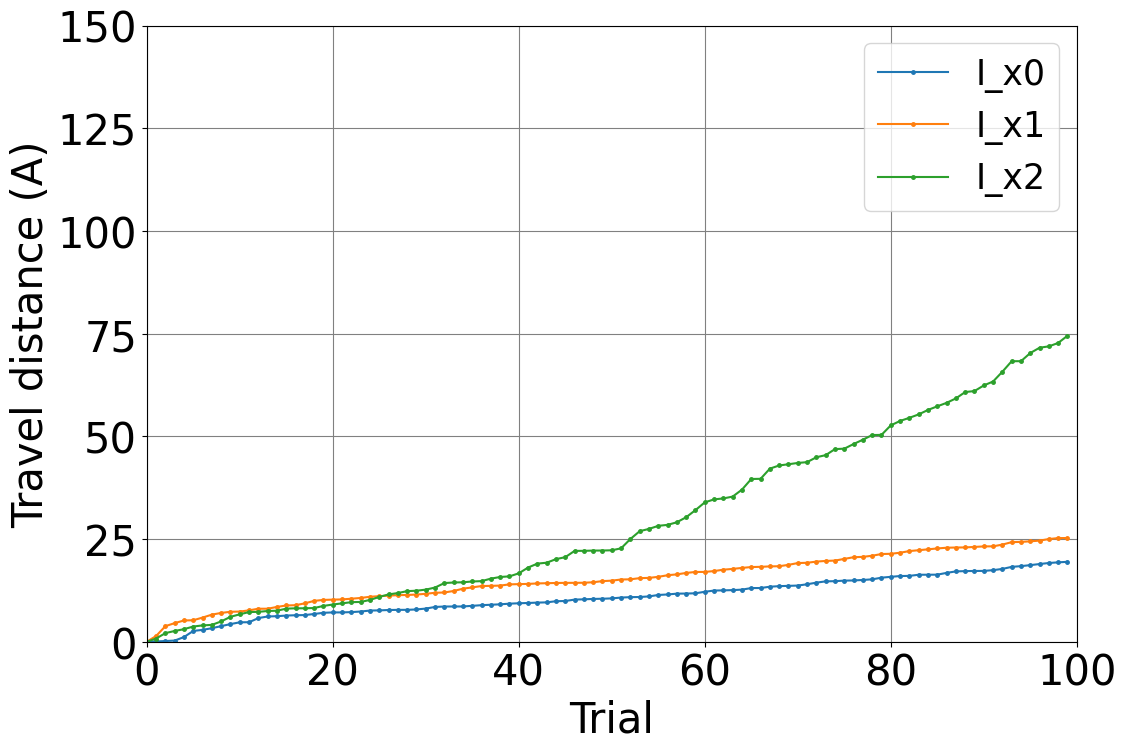

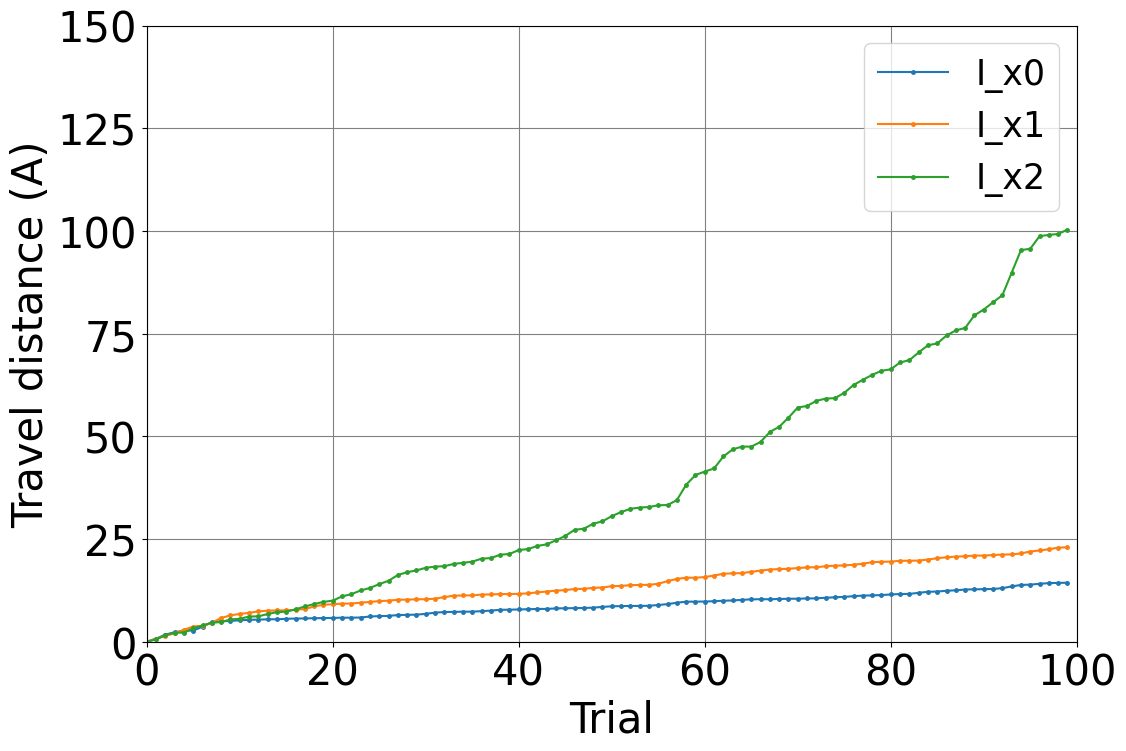

In [22]:
for i in range (5):

    figi,axi = plt.subplots(1,1,figsize=[12,8])

    TDy = [0]*100
    TDx0 = [0]*100
    TDx2 = [0]*100
    TDx4 = [0]*100

    for k in range (1 , 100):

        
        TDy[0] = 0
        TDx0[0] = 0
        TDx2[0] = 0
        TDx4[0] = 0
        
        TDy[k] = TDy[k-1] + abs(df[i]["y"][k] - df[i]["y"][k-1])
        TDx0[k] = TDx0[k-1] + abs(df[i]["x0"][k] - df[i]["x0"][k-1])
        TDx2[k] = TDx2[k-1] + abs(df[i]["x2"][k] - df[i]["x2"][k-1])
        TDx4[k] = TDx4[k-1] + abs(df[i]["x4"][k] - df[i]["x4"][k-1])

    #plt.plot(df[i]["n"],TDy, marker = "." , markersize = 5 ,label = "Beam charge")
    plt.plot(df[i]["n"],TDx0, marker = "." , markersize = 5 ,label = "I_x0")
    plt.plot(df[i]["n"],TDx2, marker = "." , markersize = 5 ,label = "I_x1")
    plt.plot(df[i]["n"],TDx4, marker = "." , markersize = 5 ,label = "I_x2")
    
    plt.tick_params(labelsize=30)
    plt.xlim(0, 100)
    plt.ylim(0, 150)
    axi.grid(which = "major" , color = "gray" , linestyle = "-")
    axi.set_xlabel("Trial", fontsize=30)
    axi.set_ylabel("Travel distance (A)", fontsize=30)
    axi.legend(fontsize=25)
    #ax_sum.set_title('6param EI All data', fontsize=30)
    
    #, label = "BPM Max Charge(" + str(i+1) + ")"


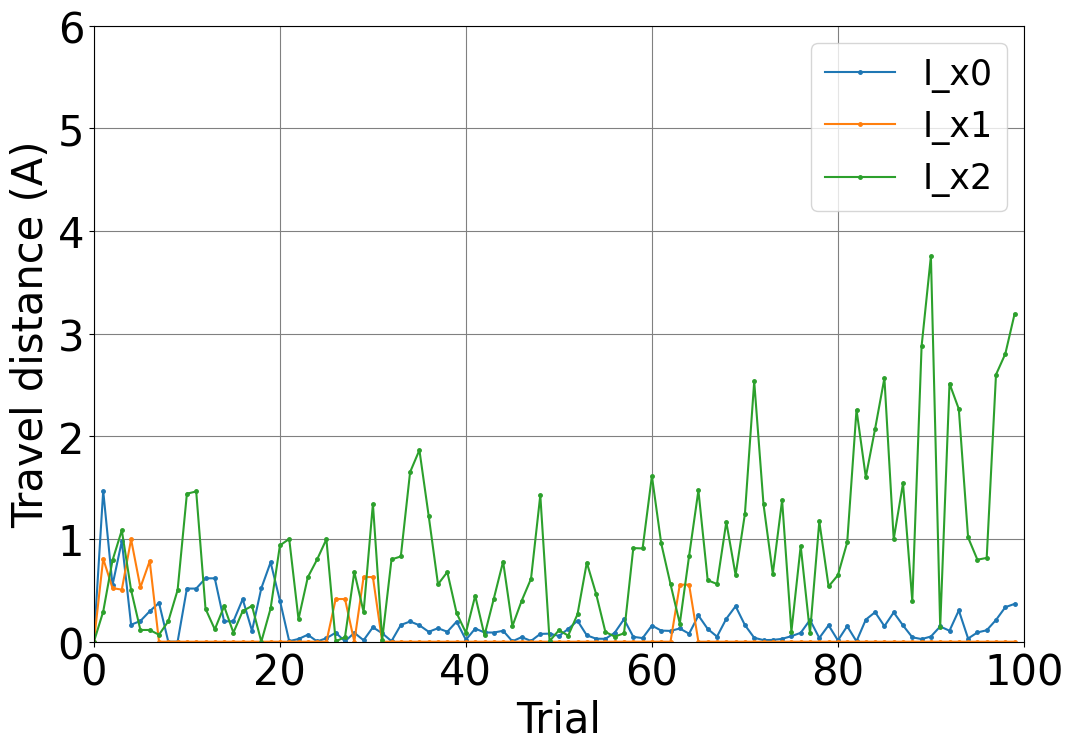

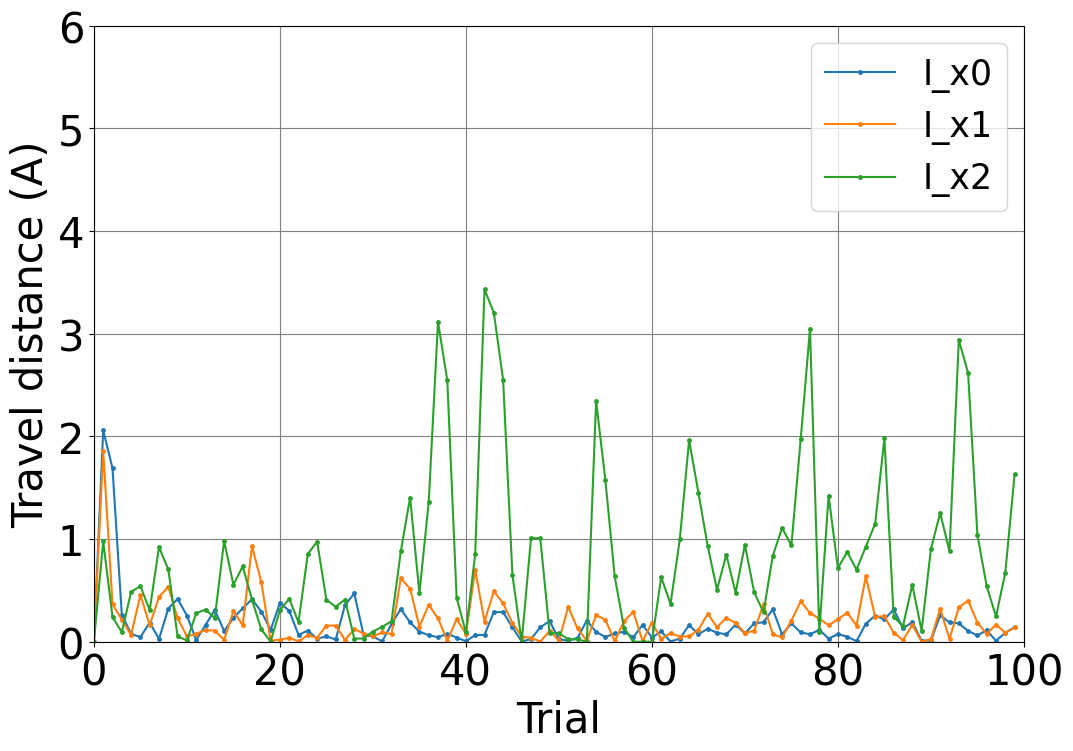

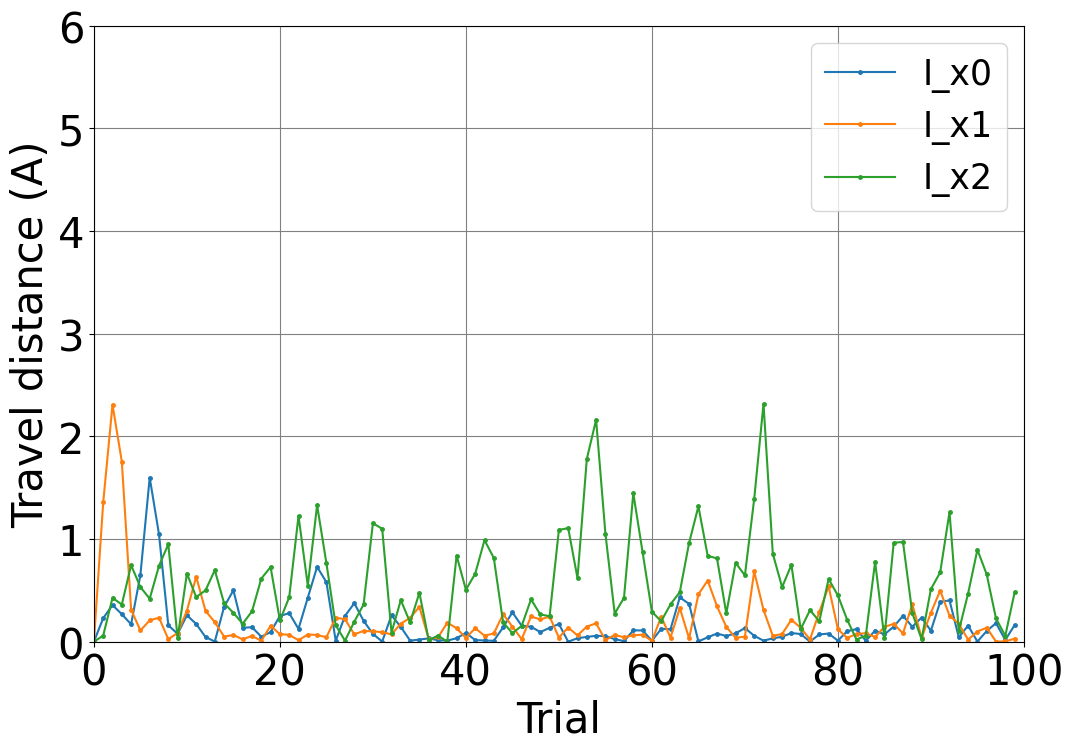

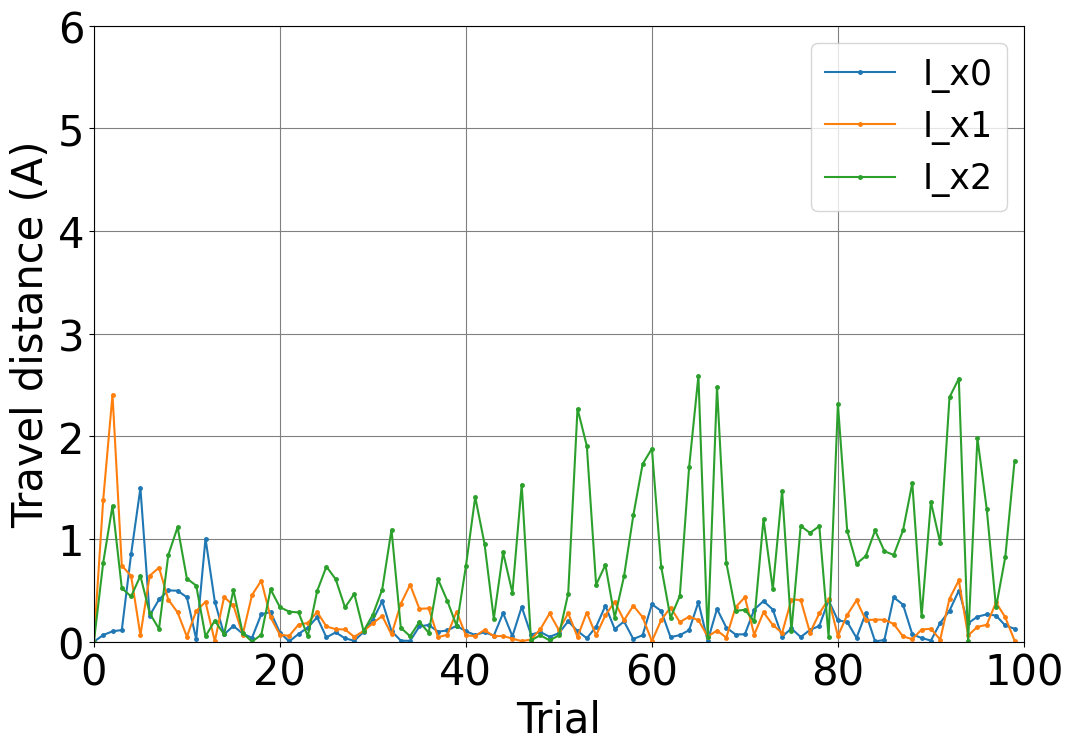

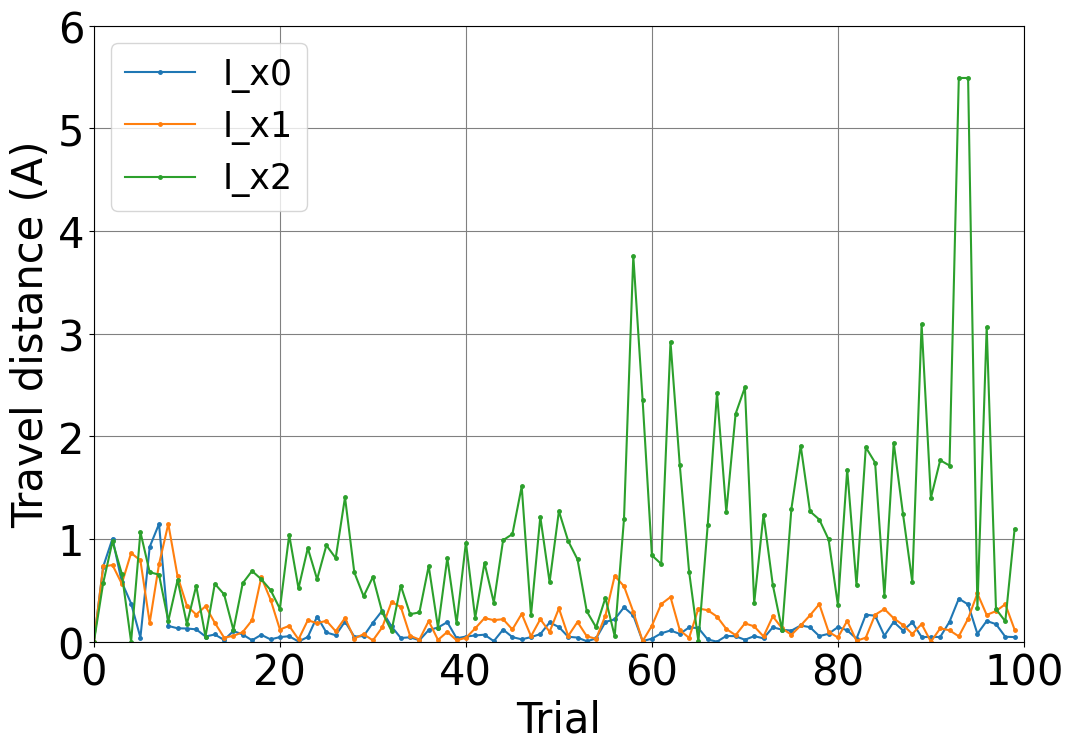

In [24]:
for i in range (5):

    figi,axi = plt.subplots(1,1,figsize=[12,8])

    TDy = [0]*100
    TDx0 = [0]*100
    TDx2 = [0]*100
    TDx4 = [0]*100

    for k in range (1 , 100):

        
        TDy[0] = 0
        TDx0[0] = 0
        TDx2[0] = 0
        TDx4[0] = 0
        
        TDy[k] = abs(df[i]["y"][k] - df[i]["y"][k-1])
        TDx0[k] = abs(df[i]["x0"][k] - df[i]["x0"][k-1])
        TDx2[k] = abs(df[i]["x2"][k] - df[i]["x2"][k-1])
        TDx4[k] = abs(df[i]["x4"][k] - df[i]["x4"][k-1])

    #plt.plot(df[i]["n"],TDy, marker = "." , markersize = 5 ,label = "Beam charge")
    plt.plot(df[i]["n"],TDx0, marker = "." , markersize = 5 ,label = "I_x0")
    plt.plot(df[i]["n"],TDx2, marker = "." , markersize = 5 ,label = "I_x1")
    plt.plot(df[i]["n"],TDx4, marker = "." , markersize = 5 ,label = "I_x2")
    
    plt.tick_params(labelsize=30)
    plt.xlim(0, 100)
    plt.ylim(0, 6)
    axi.grid(which = "major" , color = "gray" , linestyle = "-")
    axi.set_xlabel("Trial", fontsize=30)
    axi.set_ylabel("Travel distance (A)", fontsize=30)
    axi.legend(fontsize=25)
    #ax_sum.set_title('6param EI All data', fontsize=30)
    
    #, label = "BPM Max Charge(" + str(i+1) + ")"